In [1]:
from qiskit.circuit import QuantumRegister, QuantumCircuit, Qubit, ClassicalRegister
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
def qrng(n: int):
    qr = QuantumRegister(n)    
    circuit = QuantumCircuit(qr)
    circuit.h(qr)
    circuit.measure_all()
    return circuit


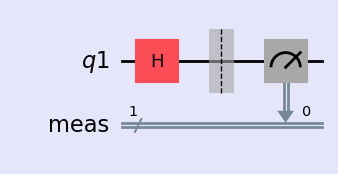

In [2]:
circuit = qrng(1)

style = {'backgroundcolor': 'lavender'}
circuit.draw(output='mpl', style = style)

In [3]:
backend = StatevectorSimulator()

In [4]:
n=1
circuit = qrng(n)

job = backend.run(circuits=circuit,shots=100)
circuit.reset(circuit.qubits)
result = job.result()
print(result.get_statevector(circuit))


Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


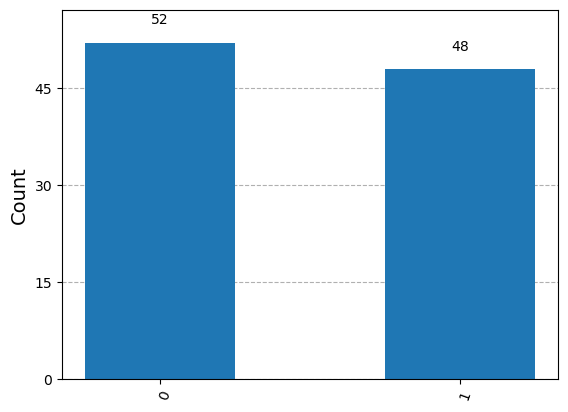

In [5]:
plot_histogram(result.get_counts(circuit))

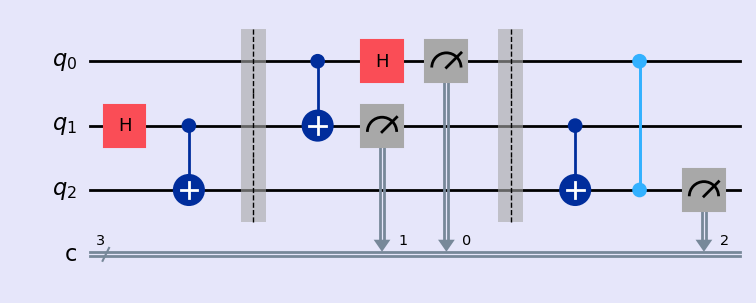

In [6]:
# teleport
def teleport():
    qc = QuantumCircuit(3,3)
    
    # create shared entangled pair (Phi +) for qubit 1,2
    qc.h(1)
    qc.cx(1,2)
    qc.barrier()

    # Bell decoding for qubit 0,1 
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])
    qc.barrier()

    qc.cx(1,2)
    qc.cz(0,2)
    qc.measure(2,2)

    return qc


circuit_teleport = teleport()
style = {'backgroundcolor': 'lavender'}
circuit_teleport.draw(output='mpl', style = style)




In [11]:
teleport_backend = StatevectorSimulator()
job_teleport = teleport_backend.run(circuits=circuit_teleport,shots=100,)
result_teleport = job_teleport.result()
print(result_teleport.get_statevector(circuit_teleport))

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,
             -0.+0.j],
            dims=(2, 2, 2))


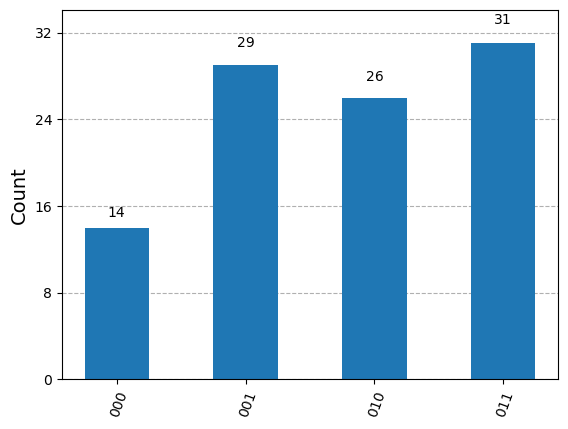

In [12]:
plot_histogram(result_teleport.get_counts(circuit_teleport))
